In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

defenders = pd.read_csv(r'C:\Users\sosan\Documents\Dissertation\DataSets\Fifa 20\TransformedData\Defenders.csv')
defenders.head(5)

Name                                           Image  \
0      Virgil van Dijk  https://cdn.sofifa.org/players/4/20/203376.png   
1    Kalidou Koulibaly  https://cdn.sofifa.org/players/4/20/201024.png   
2  Sergio Ramos García  https://cdn.sofifa.org/players/4/20/155862.png   
3    Giorgio Chiellini  https://cdn.sofifa.org/players/4/20/138956.png   
4          Diego Godín  https://cdn.sofifa.org/players/4/20/182493.png   

       Country Position  Age  Overall  Potential         Club      ID  Height  \
0  Netherlands       CB   27       90         90    Liverpool  203376   193.0   
1      Senegal       CB   28       89         89       Napoli  201024   188.0   
2        Spain       CB   33       89         89  Real Madrid  155862   182.9   
3        Italy       CB   34       89         89     Juventus  138956   188.0   
4      Uruguay       CB   33       88         88        Inter  182493   188.0   

   ...     A/W     D/W  IR PAC  SHO PAS DRI  DEF  PHY  Hits  
0  ...  Medium  Medium   3  77   60  70  71   90   86   425  
1  ...  Medium    High   3  71   28  54  67   89   87   303  
2  ...    High  Medium   4  72   68  75  73   87   85   211  
3  ...  Medium    High   4  68   46  58  60   90   82   106  
4  ...  Medium    High   3  60   48  64  61   89   83   103  

[5 rows x 75 columns]

In [29]:
defenders = defenders.drop(['Image','ID','A/W','D/W','Release Clause','Hits','Joined', 'Base Stats','Total Stats','Loan Date End', 'Release Clause','Position','Wage','Value','Name', 'BOV', 'Potential','Club'], axis = 1)

In [31]:
defenders.loc[defenders['BP'] == 'CB', 'BP'] = 0
defenders.loc[(defenders['BP'] == 'LB') | (defenders['BP'] == 'LWB'), 'BP'] = 1
defenders.loc[(defenders['BP'] == 'RB') | (defenders['BP'] == 'RWB'), 'BP'] = 2
defenders['BP'].head(10)

defenders.loc[defenders['foot'] == 'Right', 'foot'] = 1
defenders.loc[defenders['foot'] == 'Left', 'foot'] = 0

In [32]:
#Get a count of Nationalities in the Dataset, make of list of those with over 250 Players (our Major Nations)
nat_counts = defenders.Country.value_counts()
nat_list = nat_counts[nat_counts > 250].index.tolist()

#Replace Nationality with a binary indicator variable for 'Major Nation'
def major_nation(df):
    if (df.Country in nat_list):
        return 1
    else:
        return 0

#Create a copy of the original dataframe to avoid indexing errors
defenders1 = defenders.copy()

defenders1['Major_Nation'] = defenders1.apply(major_nation,axis = 1)

#Drop original columns used
defenders1 = defenders1.drop(['Country'], axis = 1)
defenders1.head()



Age  Overall  Height  Weight foot BP  Growth  Attacking  Crossing  \
0   27       90   193.0    92.3    1  0       1        314        53   
1   28       89   188.0    89.1    1  0       2        220        30   
2   33       89   182.9    82.3    1  0       0        370        66   
3   34       89   188.0    85.0    0  0       0        280        54   
4   33       88   188.0    78.2    1  0       0        308        52   

   Finishing  ...  W/F  SM  IR  PAC  SHO  PAS  DRI  DEF  PHY  Major_Nation  
0         52  ...    3   2   3   77   60   70   71   90   86             0  
1         22  ...    3   2   3   71   28   54   67   89   87             0  
2         63  ...    3   3   4   72   68   75   73   87   85             1  
3         33  ...    3   2   4   68   46   58   60   90   82             0  
4         42  ...    3   2   3   60   48   64   61   89   83             0  

[5 rows x 58 columns]

In [33]:
#Split ID as a Target value
target = defenders1.Overall
explanatory_var = defenders1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(explanatory_var, target, test_size=0.2)

#One Hot Encoding
#x_train = pd.get_dummies(x_train)
#x_test = pd.get_dummies(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(4923, 57) (4923,)
(1231, 57) (1231,)


In [34]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error

#import plotter
import seaborn as sns

import matplotlib.pyplot as  plt
%matplotlib inline

def applyModel(model, x_data, y_true):
    y_pred = model.predict(x_data)

    print('Model Name: ',type(model))
    print(y_pred[:10])
    print(y_true[:10])

    print('r2 score: '+str(r2_score(y_true, y_pred)))
    print('RMSE : '+str(np.sqrt(mean_squared_error(y_true, y_pred))))

    #Visualising the results
    # plt.figure()
    # plt.figure(figsize=(18,10))
    # sns.regplot(y_pred, y_true,scatter_kws={'color':'red','edgecolor':'blue','linewidth':'0.7'},line_kws={'color':'black','alpha':0.5})
    # plt.xlabel('Predictions')
    # plt.ylabel('Overall')
    # plt.title("Linear Prediction of Player Rating")
    # plt.show()
    plt.figure(figsize=(18,10))
    # sns.set(color_codes=True)
    # sns.set(rc={'figure.figsize':(18, 10)})
    sns.regplot(x=y_pred, y=y_true, fit_reg=False,scatter_kws={'color':'red','edgecolor':'blue','linewidth': 0.7},line_kws={'color':'black','alpha':0.5});
    #sns.regplot(x=y_pred, y=y_true,scatter=False, ax=ax, scatter_kws={"color": "green"});

Model Name:  <class 'sklearn.linear_model._base.LinearRegression'>
[67.40351405 58.61310878 65.2310287  71.49705806 62.33170619 61.06558528
 60.93985286 51.02431026 66.17629542 62.55888667]
2218    68
5329    59
3557    65
1065    72
4209    63
4889    61
4582    62
6146    48
2866    67
4090    64
Name: Overall, dtype: int64
r2 score: 0.9714343842294155
RMSE : 1.1050180960189542
Model Name:  <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
[67.97462565 58.71184523 64.98170459 72.04763921 62.43650978 61.09853757
 60.43501453 50.12541075 66.36134778 63.1749608 ]
2218    68
5329    59
3557    65
1065    72
4209    63
4889    61
4582    62
6146    48
2866    67
4090    64
Name: Overall, dtype: int64
r2 score: 0.9815148660318057
RMSE : 0.8889122602882649


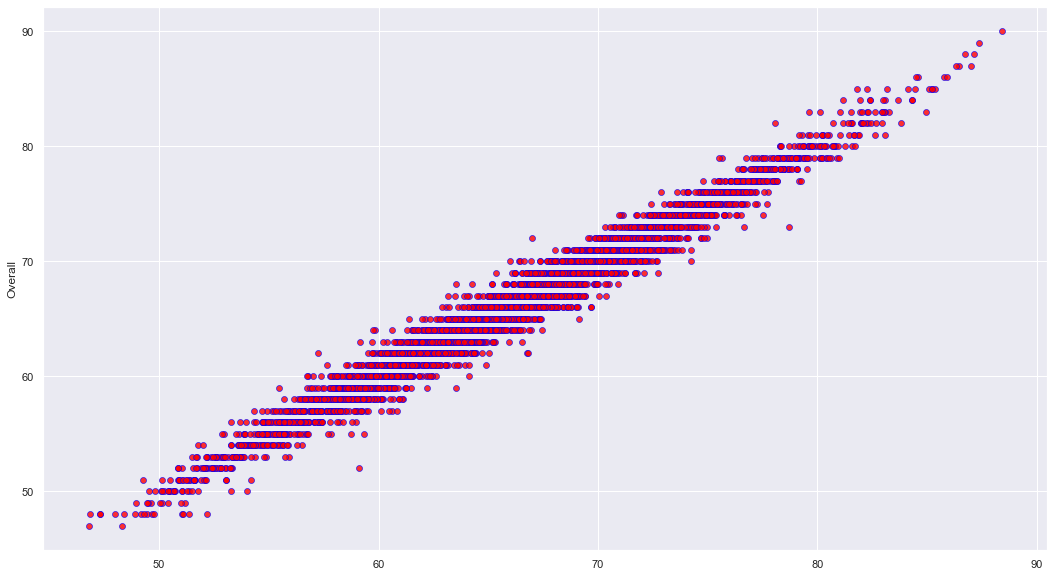

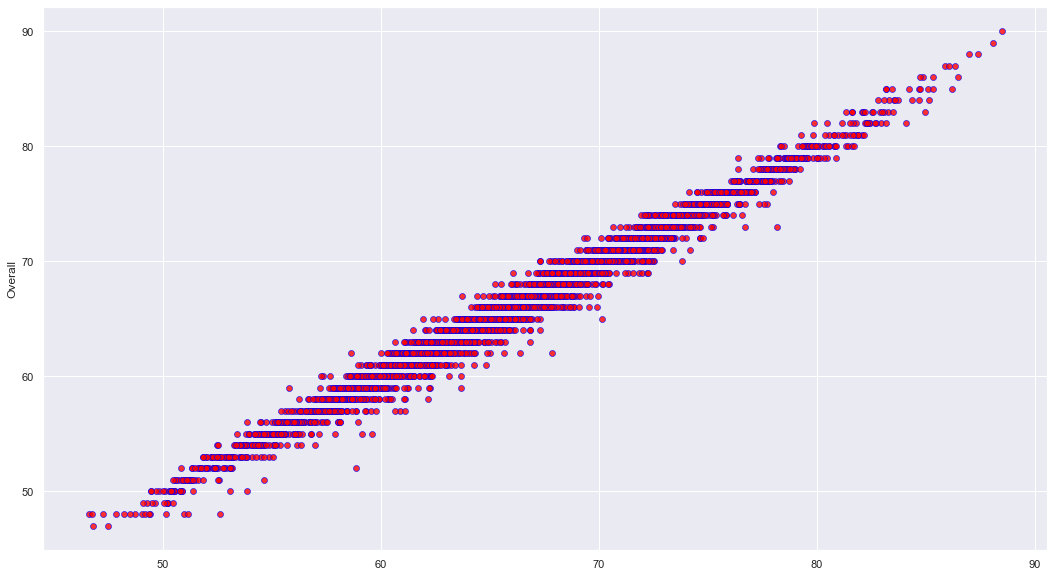

In [35]:
reg_mdels = [LinearRegression(), MLPRegressor(random_state=1, max_iter=500)]

for model in reg_mdels:
    model.fit(x_train, y_train)
    applyModel(model, x_train, y_train)

Model Name:  <class 'sklearn.linear_model._base.LinearRegression'>
[59.49553981 68.17048946 60.93117824 70.16327205 59.09084621 64.6391479
 75.70938411 64.44884029 68.63806453 71.0576736 ]
5350    59
2099    69
5236    60
1124    72
5144    60
4097    64
525     75
4080    64
2289    68
1054    72
Name: Overall, dtype: int64
r2 score: 0.9735600318014038
RMSE : 1.0716433209872183
Model Name:  <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
[59.21383383 68.04651621 59.96814613 72.30301472 59.39274784 62.83545323
 75.52015201 63.69925133 68.25149879 71.5022766 ]
5350    59
2099    69
5236    60
1124    72
5144    60
4097    64
525     75
4080    64
2289    68
1054    72
Name: Overall, dtype: int64
r2 score: 0.9822433510428223
RMSE : 0.8782138901901975


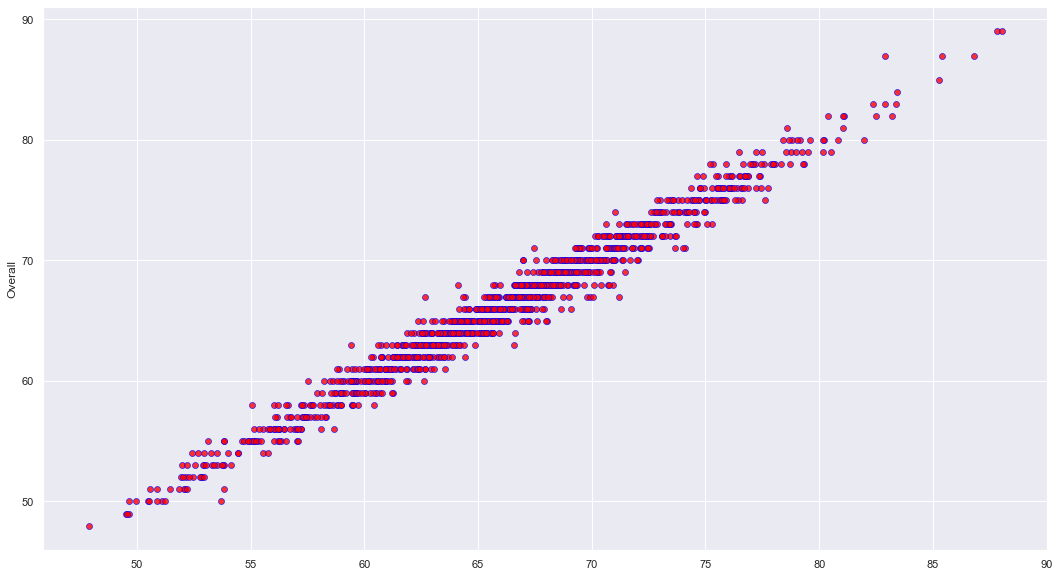

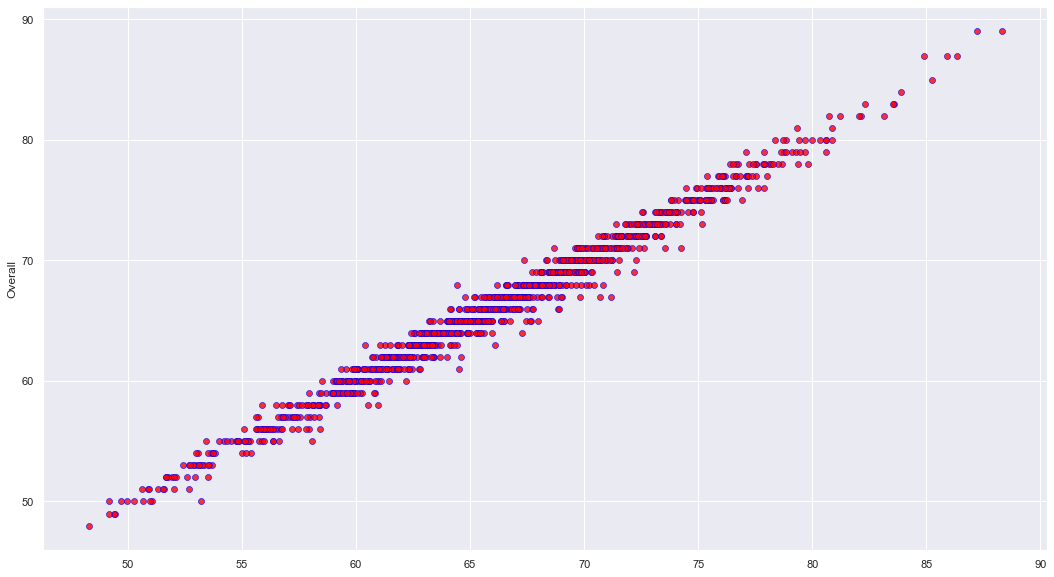

In [36]:
for model in reg_mdels:
    model.fit(x_train, y_train)
    applyModel(model, x_test, y_test)

In [37]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.inspection import permutation_importance

rf_reg_model = RandomForestRegressor(random_state=1, max_depth=10)
sgd_reg_model = SGDRegressor(random_state=1, max_iter=10)

rf_reg_model.fit(x_train, y_train)
sgd_reg_model.fit(x_train, y_train)

important_feat = rf_reg_model.feature_importances_

sgd_reg_model.fit(x_train, y_train)
# perform permutation importance
results = permutation_importance(sgd_reg_model, x_train, y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean.argsort()

print(enumerate(importance))

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

indices = np.argsort(important_feat)[-15:]  # top 10 features

print(indices)

Feature: 0, Score: 35.00000
Feature: 1, Score: 15.00000
Feature: 2, Score: 25.00000
Feature: 3, Score: 30.00000
Feature: 4, Score: 24.00000
Feature: 5, Score: 17.00000
Feature: 6, Score: 33.00000
Feature: 7, Score: 34.00000
Feature: 8, Score: 7.00000
Feature: 9, Score: 53.00000
Feature: 10, Score: 27.00000
Feature: 11, Score: 26.00000
Feature: 12, Score: 8.00000
Feature: 13, Score: 38.00000
Feature: 14, Score: 54.00000
Feature: 15, Score: 20.00000
Feature: 16, Score: 5.00000
Feature: 17, Score: 23.00000
Feature: 18, Score: 39.00000
Feature: 19, Score: 13.00000
Feature: 20, Score: 50.00000
Feature: 21, Score: 42.00000
Feature: 22, Score: 9.00000
Feature: 23, Score: 47.00000
Feature: 24, Score: 3.00000
Feature: 25, Score: 56.00000
Feature: 26, Score: 49.00000
Feature: 27, Score: 4.00000
Feature: 28, Score: 48.00000
Feature: 29, Score: 43.00000
Feature: 30, Score: 44.00000
Feature: 31, Score: 41.00000
Feature: 32, Score: 45.00000
Feature: 33, Score: 1.00000
Feature: 34, Score: 2.00000
Fea

In [42]:
indexes = defenders1._get_numeric_data().columns
print(indexes)

Index(['Age', 'Overall', 'Height', 'Weight', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'W/F',
       'SM', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Major_Nation'],
      dtype='object')


In [45]:
defending_features = ['Age', 'Height', 'Weight', 'Growth', 'Attacking', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control',
       'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions',
       'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength',
       'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning',
       'Vision', 'Penalties', 'Composure', 'Defending', 'Marking',
       'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'W/F', 'SM', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF',
       'PHY']
normalize_data = defenders1

In [46]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
normalize_data[defending_features] =  min_max.fit_transform(normalize_data[defending_features])
#df_scaled = pd.DataFrame(player, columns=numerical_Data.columns,index=numerical_Data.index)
normalize_data.head(5)

Age  Overall    Height    Weight foot BP  Growth  Attacking  Crossing  \
0  0.44       90  0.776805  0.822957    1  0    0.04   0.704981  0.531646   
1  0.48       89  0.667396  0.760700    1  0    0.08   0.344828  0.240506   
2  0.68       89  0.555799  0.628405    1  0    0.00   0.919540  0.696203   
3  0.72       89  0.667396  0.680934    0  0    0.00   0.574713  0.544304   
4  0.68       88  0.667396  0.548638    1  0    0.00   0.681992  0.518987   

   Finishing  ...  W/F   SM        IR       PAC       SHO       PAS       DRI  \
0   0.646154  ...  0.5  0.0  0.666667  0.746479  0.725806  0.766667  0.786885   
1   0.184615  ...  0.5  0.0  0.666667  0.661972  0.209677  0.500000  0.721311   
2   0.815385  ...  0.5  0.5  1.000000  0.676056  0.854839  0.850000  0.819672   
3   0.353846  ...  0.5  0.0  1.000000  0.619718  0.500000  0.566667  0.606557   
4   0.492308  ...  0.5  0.0  0.666667  0.507042  0.532258  0.666667  0.622951   

        DEF       PHY  Major_Nation  
0  1.000000  0.938776             0  
1  0.979592  0.959184             0  
2  0.938776  0.918367             1  
3  1.000000  0.857143             0  
4  0.979592  0.877551             0  

[5 rows x 58 columns]

In [47]:
#Split ID as a Target value
n_target = normalize_data.Overall
n_explanatory_var = normalize_data.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_explanatory_var, n_target, test_size=0.2)

#One Hot Encoding
#x_train = pd.get_dummies(x_train)
#x_test = pd.get_dummies(x_test)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(n_y_test.head(10))

(4923, 57) (4923,)
(1231, 57) (1231,)
2906    67
458     76
5449    58
2155    69
1346    71
1995    69
1866    69
637     74
3216    66
5795    56
Name: Overall, dtype: int64


In [48]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
n_model = LinearRegression()
n_model.fit(n_x_train, n_y_train)
n_predictions = n_model.predict(n_x_test)

print(n_predictions[:10])
print(n_y_test[:10])
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(n_y_test, n_predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(n_y_test, n_predictions))))

[68.06207282 74.30037403 59.49863769 71.84718277 70.33409346 68.36687064
 70.47164564 73.69889892 68.16837539 56.06259177]
2906    67
458     76
5449    58
2155    69
1346    71
1995    69
1866    69
637     74
3216    66
5795    56
Name: Overall, dtype: int64
r2 score: 0.9697703704146047
RMSE : 1.12164050020232


In [49]:
n_perm = PermutationImportance(n_model, random_state=1).fit(n_x_test, n_y_test)
eli5.show_weights(n_perm, feature_names = n_x_test.columns.tolist())

In [55]:
rf_reg_model = RandomForestRegressor(random_state=1, max_depth=10)
sgd_reg_model = SGDRegressor(random_state=1, max_iter=10)

rf_reg_model.fit(n_x_train, n_y_train)
sgd_reg_model.fit(n_x_train, n_y_train)

important_feat = rf_reg_model.feature_importances_

sgd_reg_model.fit(x_train, y_train)
# perform permutation importance
results = permutation_importance(sgd_reg_model, n_x_train, n_y_train, scoring='neg_mean_squared_error')

# get importance
importance = results.importances_mean.argsort()

print(importance)

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

indices = np.argsort(important_feat)[-15:]  # top 10 features

print(indices)

[26 32 22 36 31 37 15 55 16 28  3 49  0  8 45  2 43 41 50 13 46 33  1 48
 56 51 47 52 42 44 11 19 34 29 35  7  6 53 30 14  5 20 23 24 40 21 25 18
 10 27  9 54  4 12 38 17 39]
Feature: 0, Score: 26.00000
Feature: 1, Score: 32.00000
Feature: 2, Score: 22.00000
Feature: 3, Score: 36.00000
Feature: 4, Score: 31.00000
Feature: 5, Score: 37.00000
Feature: 6, Score: 15.00000
Feature: 7, Score: 55.00000
Feature: 8, Score: 16.00000
Feature: 9, Score: 28.00000
Feature: 10, Score: 3.00000
Feature: 11, Score: 49.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 8.00000
Feature: 14, Score: 45.00000
Feature: 15, Score: 2.00000
Feature: 16, Score: 43.00000
Feature: 17, Score: 41.00000
Feature: 18, Score: 50.00000
Feature: 19, Score: 13.00000
Feature: 20, Score: 46.00000
Feature: 21, Score: 33.00000
Feature: 22, Score: 1.00000
Feature: 23, Score: 48.00000
Feature: 24, Score: 56.00000
Feature: 25, Score: 51.00000
Feature: 26, Score: 47.00000
Feature: 27, Score: 52.00000
Feature: 28, Score: 42.00000

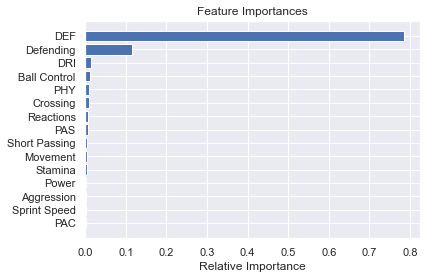

In [58]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), important_feat[indices], color='b', align='center')
plt.yticks(range(len(indices)), [n_x_test.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [59]:
x_fitted_variable = normalize_data[n_x_test.columns[indices]]
x_fitted_variable.iloc[:5]

PAC  Sprint Speed  Aggression     Power   Stamina  Movement  \
0  0.746479      0.760563    0.818182  0.939024  0.696970  0.709898   
1  0.661972      0.676056    0.893939  0.601626  0.666667  0.593857   
2  0.676056      0.647887    0.939394  0.926829  0.772727  0.781570   
3  0.619718      0.676056    0.954545  0.784553  0.454545  0.624573   
4  0.507042      0.492958    0.909091  0.743902  0.545455  0.563140   

   Short Passing       PAS  Reactions  Crossing       PHY  Ball Control  \
0       0.898305  0.766667   1.000000  0.531646  0.938776      0.852459   
1       0.779661  0.500000   0.966102  0.240506  0.959184      0.770492   
2       0.932203  0.850000   0.983051  0.696203  0.918367      0.967213   
3       0.677966  0.566667   0.898305  0.544304  0.857143      0.606557   
4       0.915254  0.666667   0.881356  0.518987  0.877551      0.819672   

        DRI  Defending       DEF  
0  0.786885   0.959184  1.000000  
1  0.721311   0.959184  0.979592  
2  0.819672   0.918367  0.938776  
3  0.606557   1.000000  1.000000  
4  0.622951   0.945578  0.979592

In [60]:
x_fit_train, x_fit_test, y_fit_train, y_fit_test = train_test_split(x_fitted_variable, n_target, test_size=0.2)
print (x_fit_train.shape, y_fit_train.shape)
print (x_fit_test.shape, y_fit_test.shape)

(4923, 15) (4923,)
(1231, 15) (1231,)


Model Name:  <class 'sklearn.linear_model._base.LinearRegression'>
[71.137864   69.49339546 70.41693606 68.19015812 70.19079992 69.75714686
 69.99539793 65.41033358 62.31108291 59.95683888]
1452    71
1415    71
1414    71
3146    66
1879    69
1690    70
1102    72
3306    66
5049    60
4930    61
Name: Overall, dtype: int64
r2 score: 0.9669902226907499
RMSE : 1.2010644222709115
Model Name:  <class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
[71.54121577 70.47174425 70.47980273 68.02993038 69.42428312 69.64017543
 69.85896283 65.52228583 62.22922479 59.22240787]
1452    71
1415    71
1414    71
3146    66
1879    69
1690    70
1102    72
3306    66
5049    60
4930    61
Name: Overall, dtype: int64
r2 score: 0.9855556424427117
RMSE : 0.794500400640386


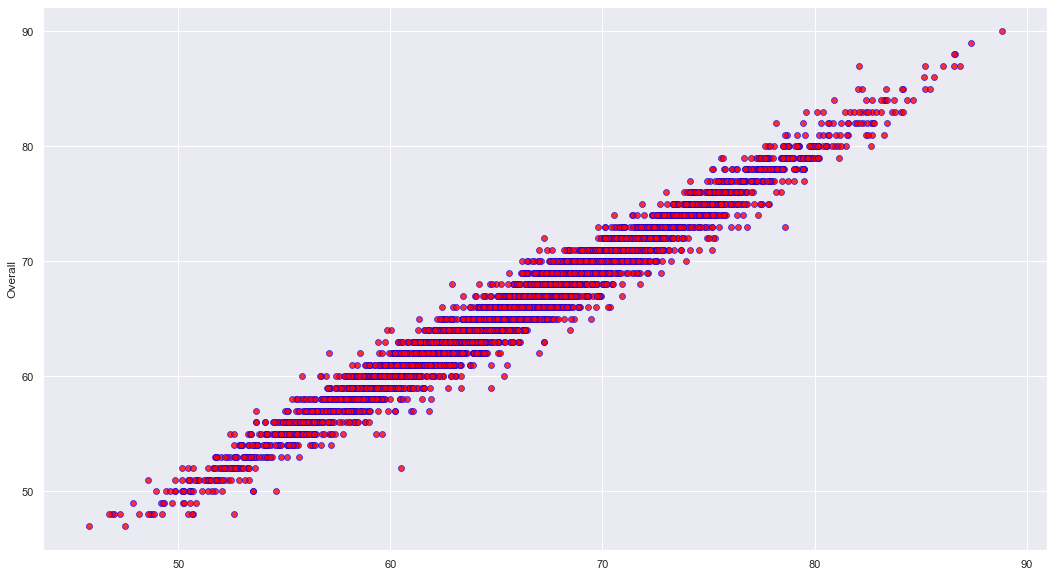

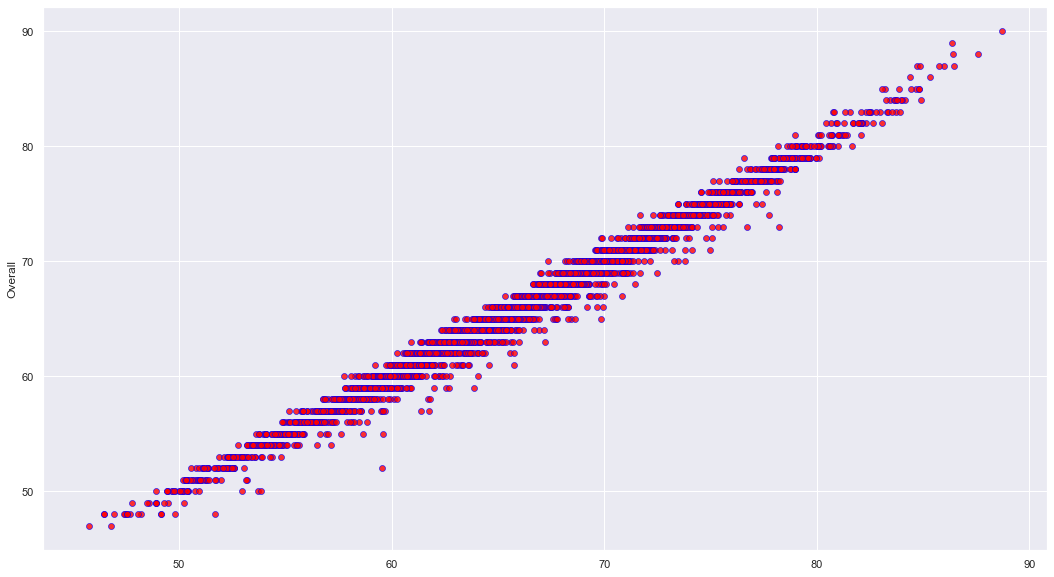

In [61]:
for model in reg_mdels:
    model.fit(x_fit_train, y_fit_train)
    applyModel(model, x_fit_train, y_fit_train)

In [ ]:
for model in reg_mdels:
    model.fit(x_fit_train, y_fit_train)
    applyModel(model, x_fit_test, y_fit_test)